<a href="https://colab.research.google.com/github/P-Sood/CMPT_340/blob/master/Birch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and pre-processed data

In [ ]:
!pip install split-folders

import feather
from numpy import argmax, where
import wave
%matplotlib inline
import IPython.display
import random
from PIL import Image
import pathlib
import csv
import glob
from google.colab import drive
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import pandas as pd 
import pickle as pkl
import seaborn as sns
import scipy
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score, completeness_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics.cluster import contingency_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model,to_categorical
import keras
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import splitfolders

In [ ]:
drive.mount('/content/gdrive', force_remount=True)
%cd gdrive/MyDrive/'CMPT 340 Project'/audio_and_txt_files

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1e1OTACsf9h9Mi5uoqIsDyb3h904F6VDk/CMPT 340 Project/audio_and_txt_files


In [ ]:
dataset = pd.read_pickle('Final_Data.pkl') 

dataset_non_Augmented = dataset[dataset['rand int i'] == -1]
dataset_Augmented = dataset[dataset['rand int i'] != -1]
dataset_Augmented.reset_index(inplace=True)

Now we have the joined dataset as well as the split versions to properly organize our models testing and training

## REMOVE

In [ ]:
dataset.info(),dataset_non_Augmented.info(),dataset_Augmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Columns: 217 entries, Patient number to Recording equipment_Meditron
dtypes: float64(196), int64(4), object(4), uint8(13)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Columns: 217 entries, Patient number to Recording equipment_Meditron
dtypes: float64(196), int64(4), object(4), uint8(13)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Columns: 218 entries, index to Recording equipment_Meditron
dtypes: float64(196), int64(5), object(4), uint8(13)
memory usage: 1.3+ MB


(None, None, None)

In [ ]:
dataset = dataset[ dataset["Diagnosis"] != "Asthma"]
dataset = dataset[ dataset["Diagnosis"] != "LRTI"  ]
dataset.reset_index(inplace=True)

dataset_non_Augmented = dataset_non_Augmented[dataset_non_Augmented["Diagnosis"] != "Asthma"]
dataset_non_Augmented = dataset_non_Augmented[dataset_non_Augmented["Diagnosis"] != "LRTI"]
dataset_non_Augmented.reset_index(inplace=True)

dataset_Augmented = dataset_Augmented[dataset_Augmented["Diagnosis"] != "Asthma"]
dataset_Augmented = dataset_Augmented[dataset_Augmented["Diagnosis"] != "LRTI"]
dataset_Augmented.reset_index(inplace=True)

In [ ]:
dataset.info(),dataset_non_Augmented.info(),dataset_Augmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Columns: 218 entries, index to Recording equipment_Meditron
dtypes: float64(196), int64(5), object(4), uint8(13)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Columns: 218 entries, index to Recording equipment_Meditron
dtypes: float64(196), int64(5), object(4), uint8(13)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Columns: 219 entries, level_0 to Recording equipment_Meditron
dtypes: float64(196), int64(6), object(4), uint8(13)
memory usage: 1.3+ MB


(None, None, None)

## REMOVE

In [ ]:
dataset_sequential_whole = dataset.copy() 
dataset_sequential_Augmented = dataset_Augmented.copy()
dataset_sequential_non_Augmented = dataset_non_Augmented.copy()
dataset

,index,Patient number,Age,Sex,Diagnosis,Binary_diagnosis,Recording index,new BMI,zero_crossing,centroids,energy,rand int i,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,...,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,Chest location_Al,Chest location_Ar,Chest location_Ll,Chest location_Lr,Chest location_Pl,Chest location_Pr,Chest location_Tc,Acquisition mode_mc,Acquisition mode_sc,Recording equipment_AKGC417L,Recording equipment_Litt3200,Recording equipment_LittC2SE,Recording equipment_Meditron
0,0,101,3.00,0,URTI,Unhealthy,1b1,19.385777,834,862,24.354544,-1,-583.074829,95.407684,57.615402,31.388035,28.196554,33.571594,31.646765,22.791107,16.666695,15.631426,14.037862,9.235232,5.834866,7.332277,10.597386,10.617828,7.180680,3.737869,2.680353,3.642111,5.495842,7.373888,8.116691,6.516584,3.175952,0.672749,0.915031,3.079237,...,1.728973e-07,1.738731e-07,1.769270e-07,1.728405e-07,1.709613e-07,1.697057e-07,1.698561e-07,1.716227e-07,1.743128e-07,1.806536e-07,1.831783e-07,1.743893e-07,1.328132e-07,1.112076e-07,24.108521,12.576147,13.513313,14.723985,16.083529,13.537544,28.755852,-0.015893,0.028519,-0.082620,0.048922,0.035543,0.010514,0,0,0,0,0,1,0,0,1,0,0,0,1
1,1,101,3.00,0,URTI,Unhealthy,1b1,19.385777,938,862,40.098251,-1,-529.150757,104.431587,70.155006,42.595573,31.283190,27.506977,22.269215,16.563374,15.326893,16.716825,14.707142,8.446252,3.871402,4.893015,8.417205,9.325685,6.879937,3.962098,2.855496,3.370863,4.458168,5.342813,5.608436,4.753032,2.933595,1.404434,1.264880,2.176501,...,2.542159e-07,2.599661e-07,2.753871e-07,2.632678e-07,2.556239e-07,2.714140e-07,2.835432e-07,3.009890e-07,3.235409e-07,3.527952e-07,4.131382e-07,5.203320e-07,6.602992e-07,7.155102e-07,21.529142,11.710819,13.348330,14.907793,16.954568,13.540970,28.758001,0.024129,0.015229,-0.107902,0.014130,0.014674,-0.004861,1,0,0,0,0,0,0,0,1,0,0,0,1
2,2,102,0.75,0,Healthy,Healthy,1b1,18.389942,1009,862,15.837536,-1,-596.955933,116.085419,60.695057,25.555992,26.209230,38.512352,36.051533,18.640724,3.533884,0.808337,5.736544,9.657865,9.137486,5.530644,2.170750,2.102858,5.248150,7.930713,7.101245,4.055319,2.352255,3.208253,4.845040,5.344265,4.519351,3.379910,2.771019,2.687288,...,1.025937e-07,1.011247e-07,1.017891e-07,1.008913e-07,9.857648e-08,9.736862e-08,9.689317e-08,9.504856e-08,9.403183e-08,9.480667e-08,9.228317e-08,7.141852e-08,2.596839e-08,3.352563e-09,22.001710,11.461202,14.800548,15.227452,15.865647,13.587686,28.836766,0.059854,0.050555,-0.053679,0.046902,0.007503,0.004685,0,1,0,0,0,0,0,0,1,0,0,0,1
3,4,104,70.00,0,COPD,Unhealthy,1b1,28.470000,831,648,56.509598,-1,-424.268616,59.955784,50.275135,38.291904,27.447374,19.641413,15.319858,14.077450,14.971409,16.690376,17.948116,17.959871,16.606979,14.217122,11.247156,8.132569,5.296245,3.138010,1.914241,1.616304,2.000694,2.753793,3.620424,4.395525,4.869637,4.867006,4.361364,3.522510,...,4.886360e-09,4.704167e-09,4.539293e-09,4.387901e-09,4.252693e-09,4.133347e-09,4.022551e-09,3.930130e-09,3.847529e-09,3.776099e-09,3.719050e-09,3.672473e-09,3.640387e-09,3.618832e-09,24.231688,14.313585,17.410904,19.179523,40.675148,19.165556,19.578840,-0.020600,0.016854,-0.102233,0.004000,0.017646,0.002610,0,0,0,1,0,0,0,0,1,0,1,0,0
4,5,104,70.00,0,COPD,Unhealthy,1b1,28.470000,4268,1102,47.924110,-1,-443.015717,106.845009,74.780205,40.033150,16.150705,6.414668,5.623073,7.302594,8.734268,10.403658,12.732615,14.533298,14.256553,11.709416,8.095510,4.730742,2.155521,0.386362,-0.481122,-0.242964,0.982270,2.605332,3.957437,4.724201,4.930986,4.625820,3.759405,2.412742,...,1.074350e-10,1.033897e-10,9.973590e-11,9.637932e-11,9.337561e-11,9.072832e-11,8.827520e-11,8.622253e-11,8.439215e-11,8.281121e-11,8.154581e-11,8.051374e-11,7.980280e-11,7.932340e-11,19.341615,13.058082,17.626779,23.569384,38.163289,12.302099,12.288822,-0.020917,0.014159,-0.084030,0.027118,0.020544,0.004155,0,1,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

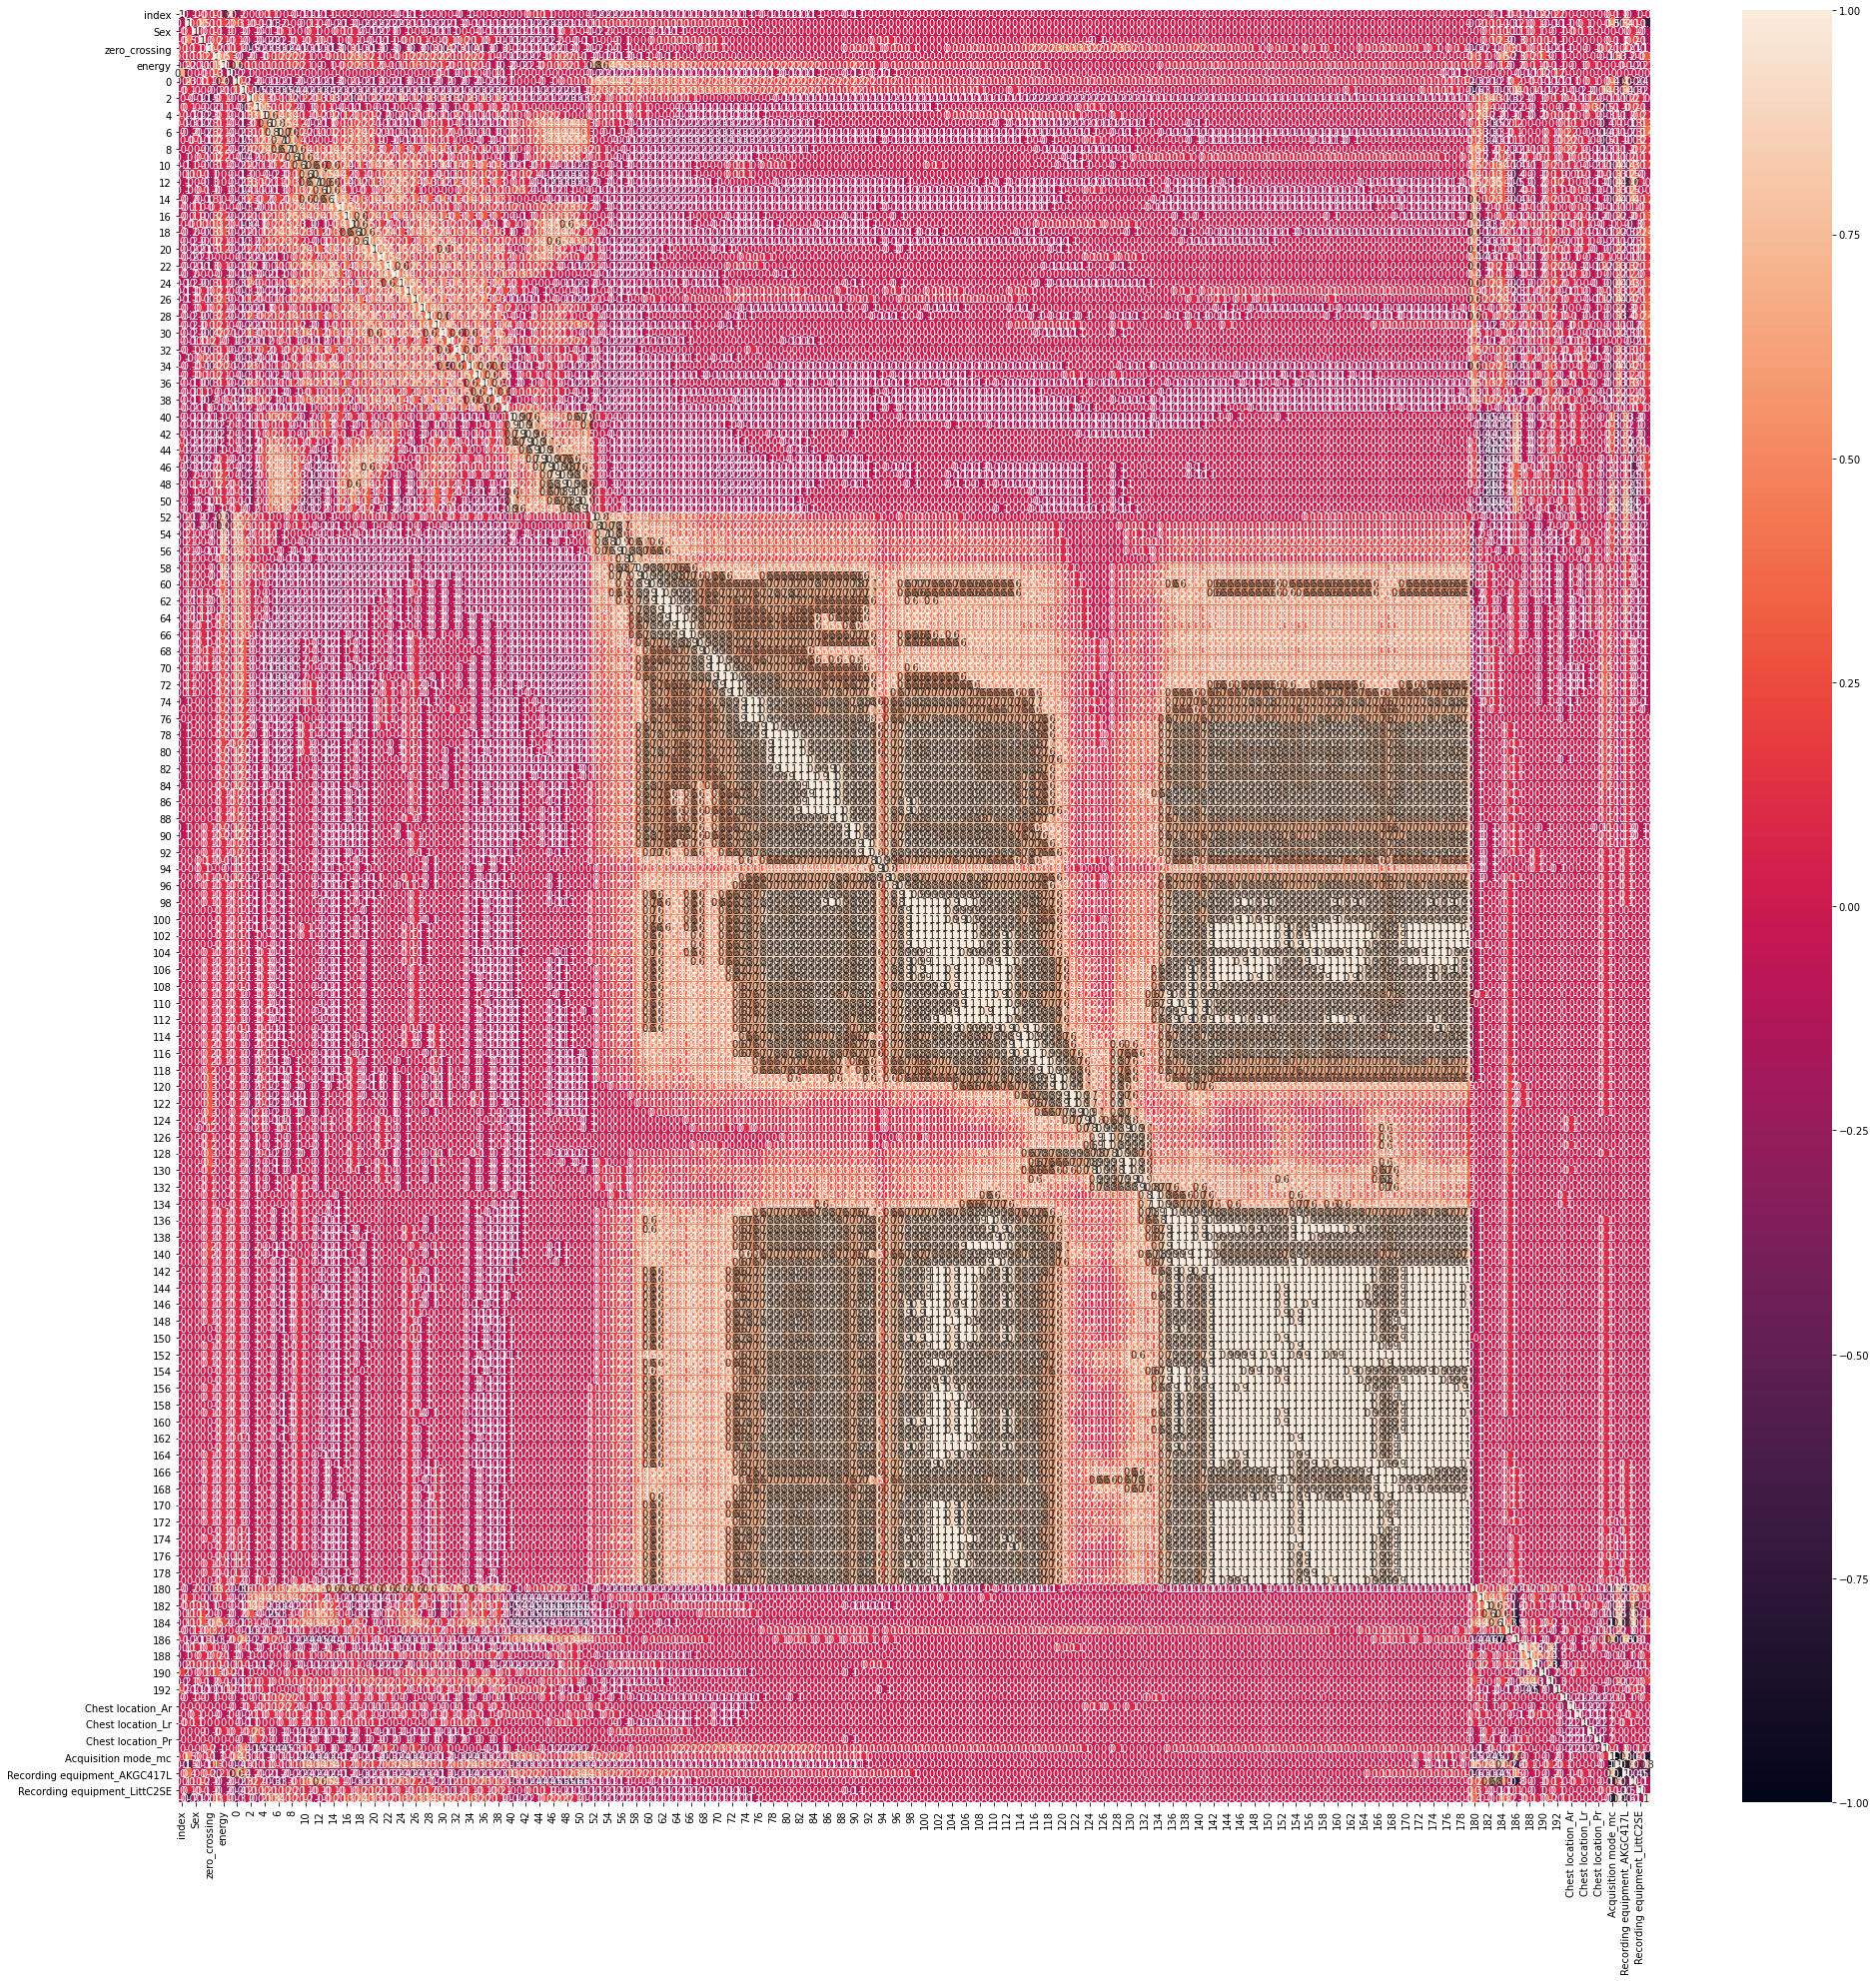

In [ ]:
plt.figure(figsize = (33,33))
sns.heatmap(dataset.corr().round(1), annot = True)

In [ ]:
dataset["Diagnosis"] = dataset["Diagnosis"].astype('category')
dataset["Diagnosis"] = dataset["Diagnosis"].cat.codes
dataset['Binary_diagnosis'] = (dataset['Binary_diagnosis'] == "Healthy").astype(int)

dataset_non_Augmented["Diagnosis"] = dataset_non_Augmented["Diagnosis"].astype('category')
dataset_non_Augmented["Diagnosis"] = dataset_non_Augmented["Diagnosis"].cat.codes
dataset_non_Augmented['Binary_diagnosis'] = (dataset_non_Augmented['Binary_diagnosis'] == "Healthy").astype(int)

dataset_Augmented["Diagnosis"] = dataset_Augmented["Diagnosis"].astype('category')
dataset_Augmented["Diagnosis"] = dataset_Augmented["Diagnosis"].cat.codes
dataset_Augmented['Binary_diagnosis'] = (dataset_Augmented['Binary_diagnosis'] == "Healthy").astype(int)

Cat codes work by doing a label encoding alphabetically, so URTI will be 5 because it is lowest 

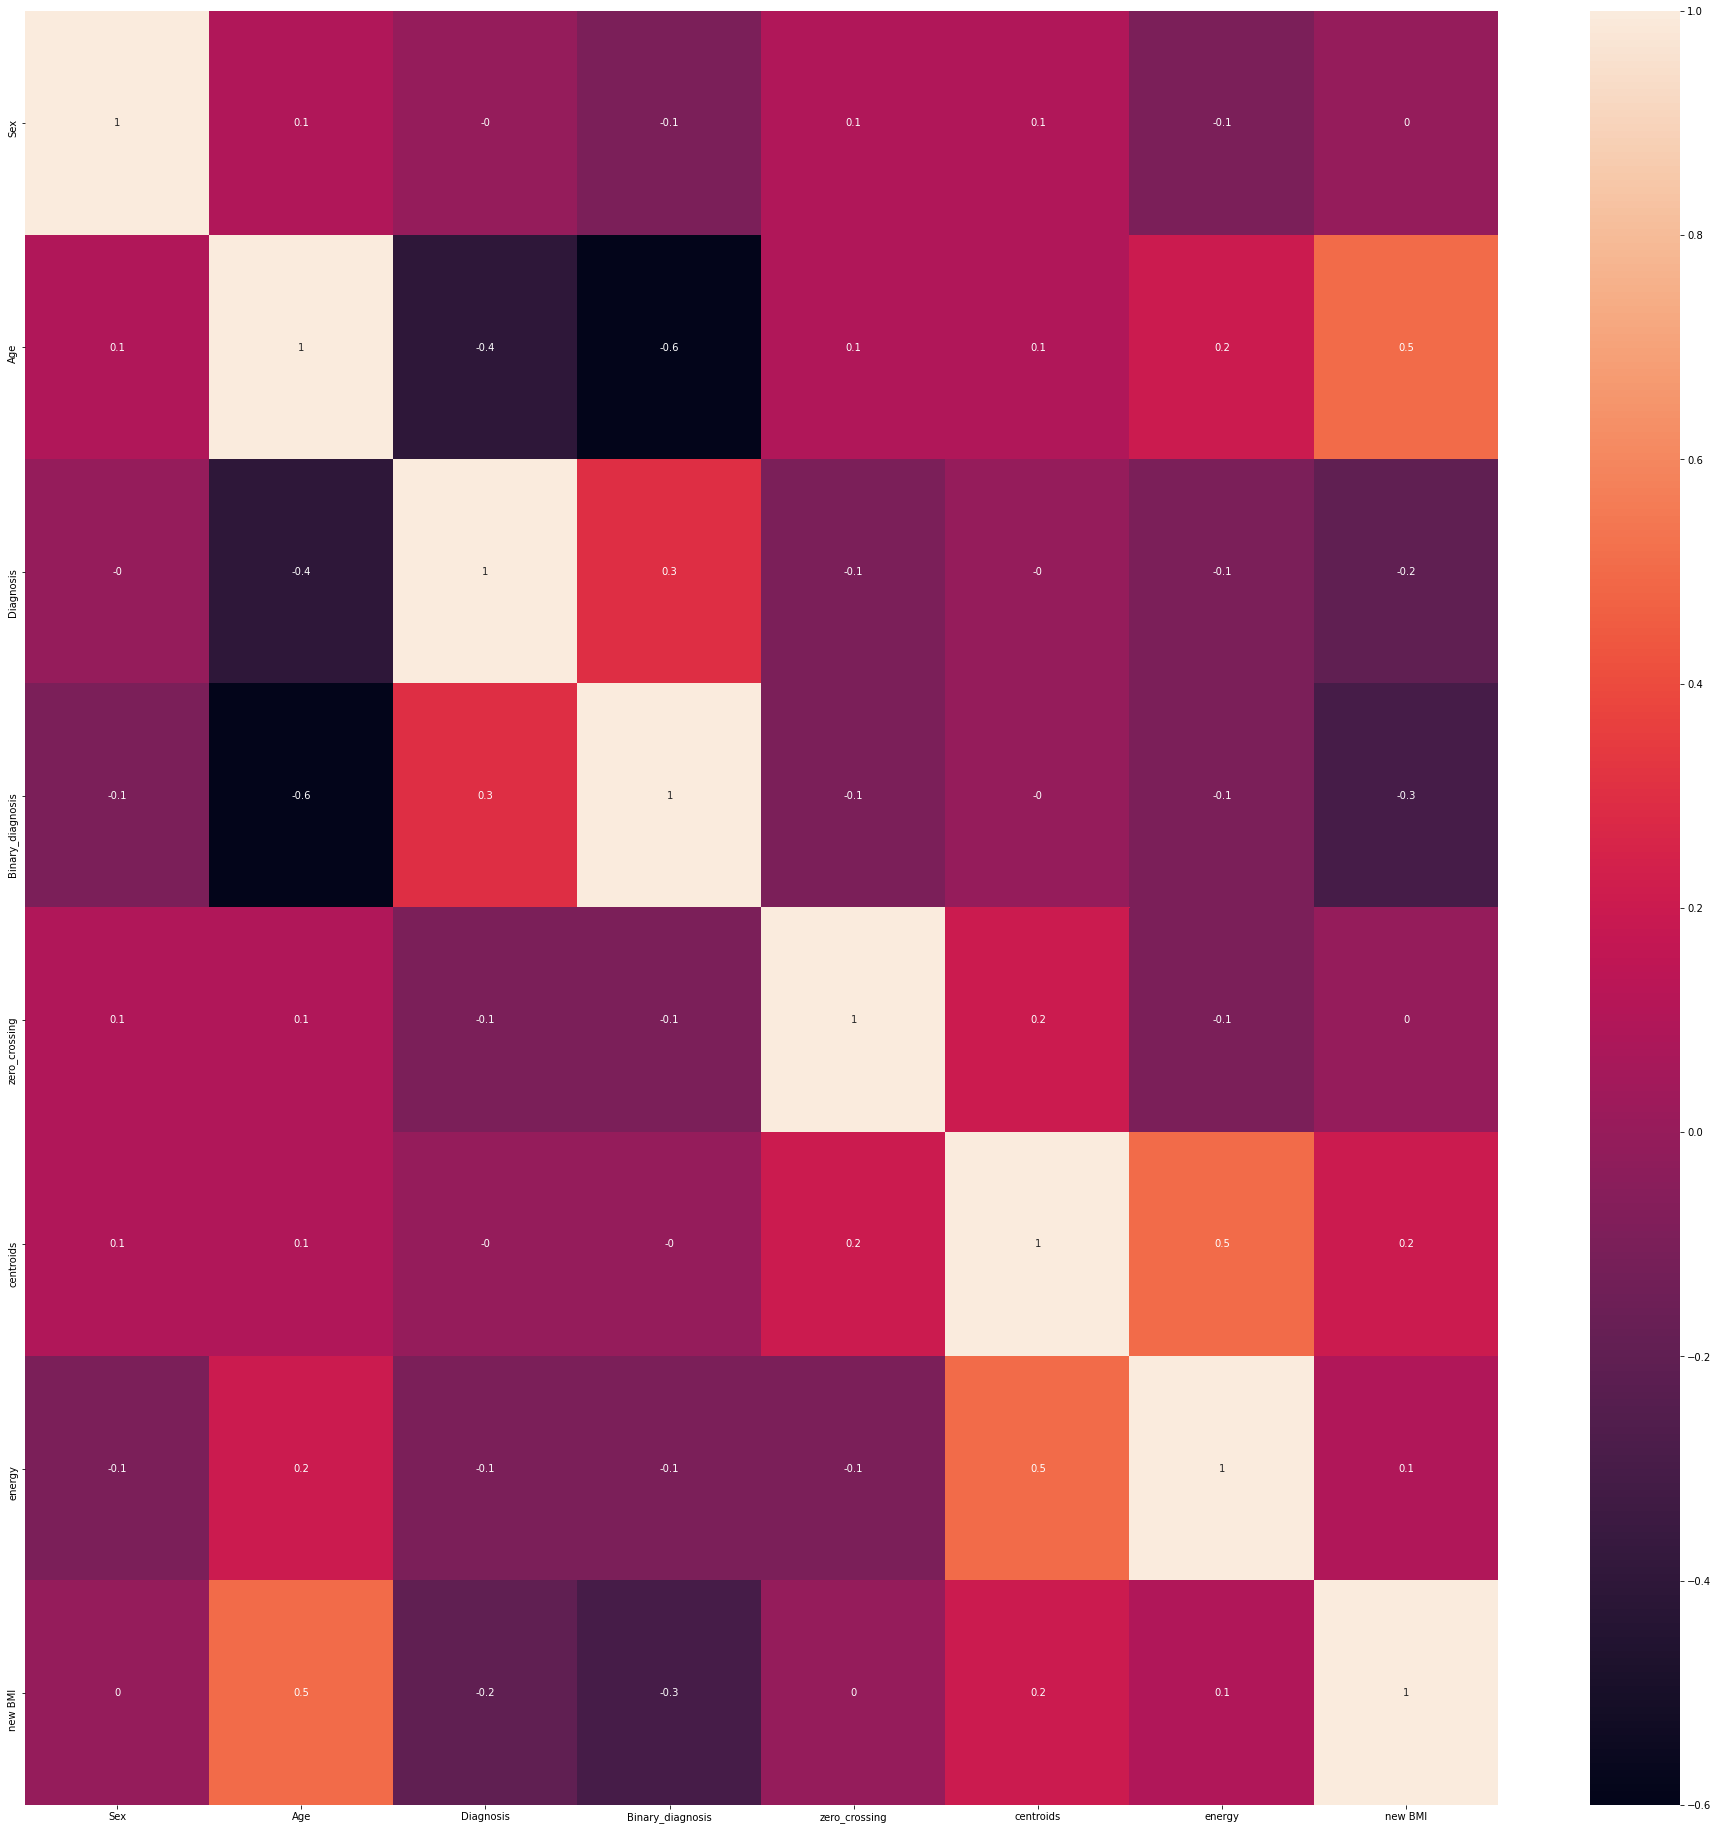

In [ ]:
correlation_heatmap = dataset[['Patient number', 'Sex' ,	'Age'	,'Diagnosis',	'Binary_diagnosis',	'zero_crossing',	'centroids',	'energy',	'new BMI']]
plt.figure(figsize = (33,33))
sns.heatmap(correlation_heatmap.corr().round(1), annot = True)

In [ ]:
print("Number of Healthy Patients: ",(dataset['Binary_diagnosis'] == 1).sum())
print("Number of Unhealthy Patients: ",(dataset['Binary_diagnosis'] == 0).sum())
print("\n")
#print("Number of Patients with Asthma are: ",(dataset['Diagnosis'] == 0).sum())
print("Number of Patients with Bronchiectasis are: ",(dataset['Diagnosis'] == 0).sum())
print("Number of Patients with Bronchiolitis are: ",(dataset['Diagnosis'] == 1).sum())
print("Number of Patients with COPD are: ",(dataset['Diagnosis'] == 2).sum())
print("Number of Patients that are Healthy, are: ",(dataset['Diagnosis'] == 3).sum())
#print("Number of Patients with LRTI are: ",(dataset['Diagnosis'] == 5).sum())
print("Number of Patients with Pneumonia are: ",(dataset['Diagnosis'] == 4).sum())
print("Number of Patients with URTI are: ",(dataset['Diagnosis'] == 5).sum())

Number of Healthy Patients:  56
Number of Unhealthy Patients:  1526


Number of Patients with Bronchiectasis are:  32
Number of Patients with Bronchiolitis are:  24
Number of Patients with COPD are:  1388
Number of Patients that are Healthy, are:  56
Number of Patients with Pneumonia are:  48
Number of Patients with URTI are:  34


## Multi Classification of Whole Dataset

In [ ]:
features = dataset.drop(columns = ['Diagnosis','Binary_diagnosis','Patient number','Recording index',"rand int i"])

targets = dataset[['Diagnosis']]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(features, targets, test_size=0.2) # rand state sets a seed so that it will be the same 

In [ ]:
X_train_whole_dataset = X_train.values
X_test_whole_dataset = X_test.values

In [ ]:
y_train_multi_whole_dataset = y_train.values.reshape(-1,)
y_test_multi_whole_dataset = y_test.values.reshape(-1,)

## Binary Classification of Whole Dataset

In [ ]:
# targets = dataset[['Binary_diagnosis']]

# y = targets.values.reshape(-1,)

y_train_binary_whole_dataset = (y_train["Diagnosis"] == 4).astype(int).values.reshape(-1,)
y_test_binary_whole_dataset = (y_test["Diagnosis"] == 4).astype(int).values.reshape(-1,)

## Multi Classification of Augmented Dataset

In [ ]:
features = dataset_Augmented.drop(columns = ['Diagnosis','Binary_diagnosis','Patient number','Recording index',"rand int i"])
targets = dataset_Augmented[['Diagnosis']]

X_train, X_test, y_train, y_test=train_test_split(features, targets, test_size=0.2 , random_state = 5000) # rand state sets a seed so that it will be the same 

In [ ]:
X_train_augmented_dataset = X_train.values
X_test_augmented_dataset = X_test.values

In [ ]:
y_train_multi = y_train.values.reshape(-1,)
y_test_multi = y_test.values.reshape(-1,)

## Binary Classification of Augmented Dataset


In [ ]:
y_train_binary = (y_train["Diagnosis"] == 4).astype(int).values.reshape(-1,)
y_test_binary = (y_test["Diagnosis"] == 4).astype(int).values.reshape(-1,)

Training on the augmented dataset will be interesting, especially in relation to non-augmented

##Non-Augmented Dataset

We want to use the same data rows, so all we do is change the X_trains to be from the non augmented dataset, now the binary and multi classification values will stay the same

In [ ]:
X_train_non = dataset_non_Augmented.loc[X_train.index].drop(columns = ['Diagnosis','Binary_diagnosis','Patient number','Recording index',"rand int i"])
X_test_non = dataset_non_Augmented.loc[X_test.index].drop(columns = ['Diagnosis','Binary_diagnosis','Patient number','Recording index',"rand int i"])

In [ ]:
X_train_non_augmented_dataset =  X_train_non.values
X_test_non_augmented_dataset = X_test_non.values

Training on the augmented dataset will be interesting, especially in relation to non-augmented

# Birch

Firstly, we will work with the augmented and non-augmented datasets that have been split.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import Birch

### Binary Diagnosis - Whole Data

In [ ]:
pca = PCA(2)

X_pca_train = pca.fit_transform(X_train_whole_dataset)
X_pca_test = pca.fit_transform(X_test_whole_dataset)
brc = Birch(n_clusters = 2) 
brc.fit(X_pca_train)

y_train_predict = brc.predict(X_pca_train)
y_test_predict = brc.predict(X_pca_test)

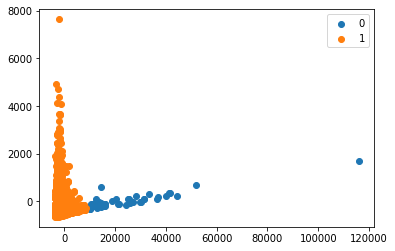

In [ ]:
u_labels = np.unique(y_train_predict)
centroids = brc.subcluster_centers_

for i in u_labels:
    plt.scatter(X_pca_train[y_train_predict == i , 0] , X_pca_train[y_train_predict == i , 1] , label = i)

plt.legend()
plt.show()

As we can notice, it is classifying everything as 1, which for us was healthy. So I will do a calculation to switch up the labels to their proper label.\
Since we know that Unhealthy is vastly bigger

In [ ]:
y_train_predict[:] = [abs(x - 1) for x in y_train_predict]
y_test_predict[:] = [abs(x - 1) for x in y_test_predict]

No handles with labels found to put in legend.


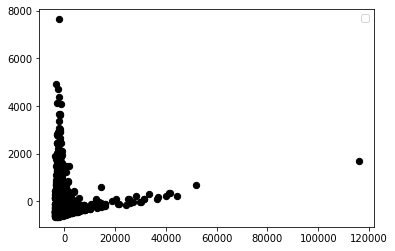

In [ ]:
plt.scatter(centroids[:,0] , centroids[:,1] , s = 40, color = 'k')
plt.legend()
plt.show()
# Each of these points then is it its own cluster denoted as subcluster in the birch algorithm since, it then gets clustered again based off of distance from each "leaf"

In [ ]:
confusion_matrix_train = contingency_matrix(y_train_binary_whole_dataset,y_train_predict)
confusion_matrix_test = contingency_matrix(y_test_binary_whole_dataset,y_test_predict)

confusion = [confusion_matrix_train,confusion_matrix_test]
title = ["confusion_matrix_train","confusion_matrix_test"]
for x in confusion:
  print(x)

[[1174   51]
 [  40    0]]
[[304   5]
 [  8   0]]


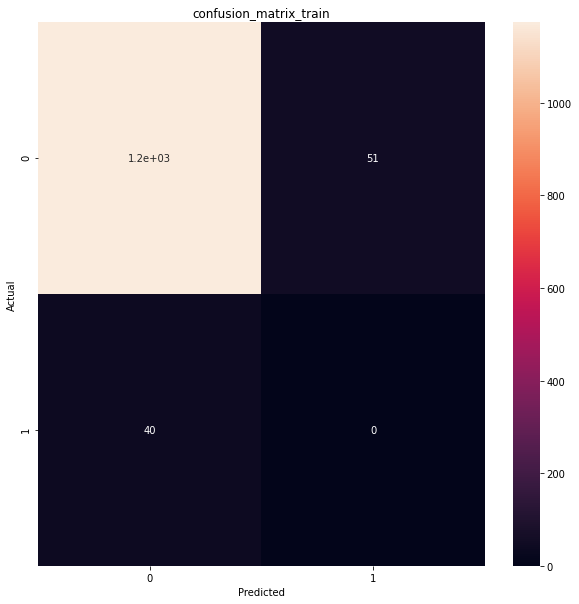

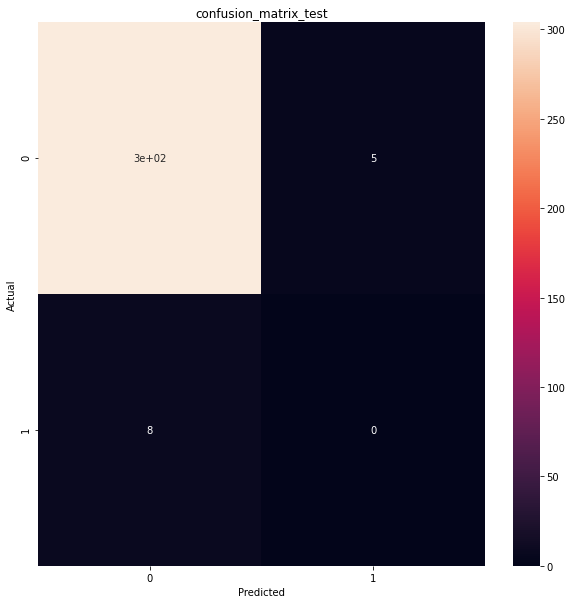

In [ ]:
for i in range(2):
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(confusion[i], annot=True)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(title[i])
  plt.show()

In [ ]:
print("**Training Score:** {}\\".format(accuracy_score(y_train_binary_whole_dataset,y_train_predict)))
print("**Test Score:** {}\\".format(accuracy_score(y_test_binary_whole_dataset,y_test_predict)))

**Training Score:** 0.9280632411067193\
**Test Score:** 0.9589905362776026\


### Multi Diagnosis - Whole Data

In [ ]:
brc = Birch(n_clusters=6)

brc.fit(X_pca_train)

y_train_predict = brc.predict(X_pca_train)
y_test_predict = brc.predict(X_pca_test)


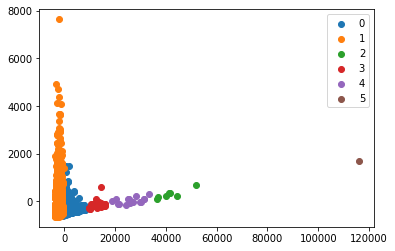

In [ ]:
u_labels = np.unique(y_train_predict)
centroids = brc.subcluster_centers_

for i in u_labels:
    plt.scatter(X_pca_train[y_train_predict == i , 0] , X_pca_train[y_train_predict == i , 1] , label = i)
 

plt.legend()
plt.show()

In [ ]:
confusion_matrix_train = contingency_matrix(y_train_multi_whole_dataset,y_train_predict)
confusion_matrix_test = contingency_matrix(y_test_multi_whole_dataset,y_test_predict)

In [ ]:
confusion_matrix_train = confusion_matrix_train[:, [2, 1, 0, 3, 4,5]]
confusion_matrix_test = confusion_matrix_test[:, [2, 1, 0, 3, 4,5]]

confusion = [confusion_matrix_train,confusion_matrix_test]
title = ["confusion_matrix_train","confusion_matrix_test"]

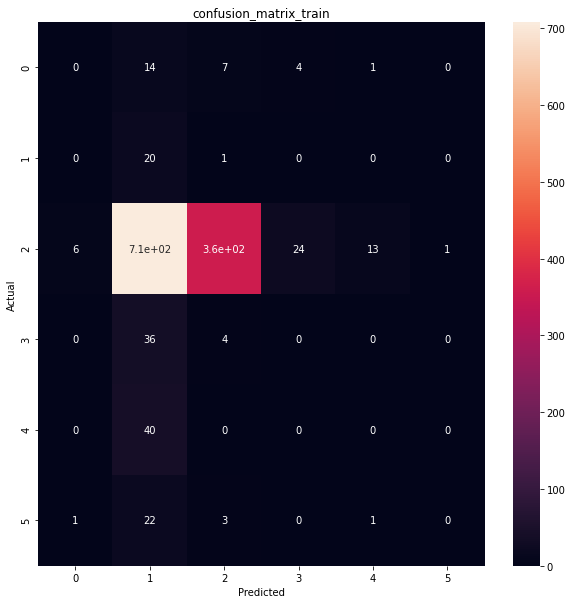

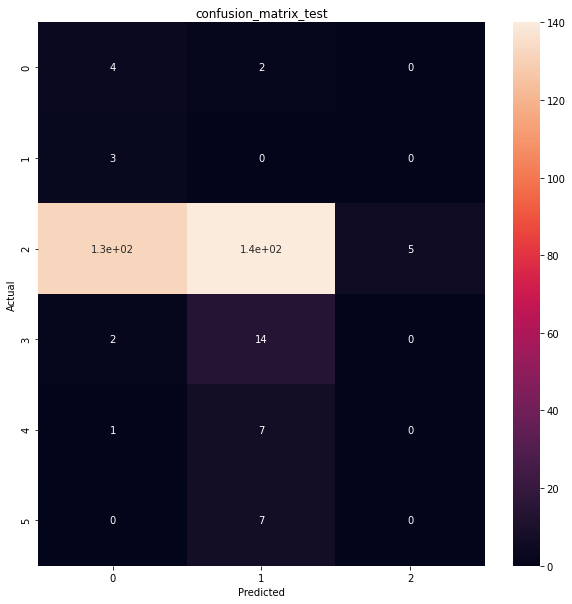

In [ ]:
for i in range(2):
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(confusion[i], annot=True)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(title[i])
  plt.show()

In [ ]:
print("**Training Score:** {}\\".format(accuracy_score(y_train_multi_whole_dataset,y_train_predict)))
print("**Test Score:** {}\\".format(accuracy_score(y_test_multi_whole_dataset,y_test_predict)))

**Training Score:** 0.039525691699604744\
**Test Score:** 0.028391167192429023\


### Binary Diagnosis - Non Augmented

In [ ]:
X_pca_train_non_augmented = pca.fit_transform(X_train_non_augmented_dataset)
X_pca_test_non_augmented = pca.fit_transform(X_test_non_augmented_dataset)

brc = Birch(n_clusters=2)

brc.fit(X_pca_train_non_augmented)

y_train_predict = brc.predict(X_pca_train_non_augmented)

y_test_predict = brc.predict(X_pca_test_non_augmented)

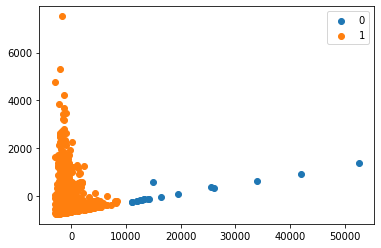

In [ ]:
u_labels = np.unique(y_train_predict)
centroids = brc.subcluster_centers_

for i in u_labels:
    plt.scatter(X_pca_train_non_augmented[y_train_predict == i , 0] , X_pca_train_non_augmented[y_train_predict == i , 1] , label = i)
 

plt.legend()
plt.show()

Similar thing here where our data is clustered to be 1, but we know from fact that this must be Unhealthy and so I will correct the labels to be consistent with our own ground truth labels

In [ ]:
y_train_predict[:] = [abs(x - 1) for x in y_train_predict]
y_test_predict[:] = [abs(x - 1) for x in y_test_predict]

In [ ]:
confusion_matrix_train = contingency_matrix(y_train_binary,y_train_predict)
confusion_matrix_test = contingency_matrix(y_test_binary,y_test_predict)

confusion = [confusion_matrix_train,confusion_matrix_test]
title = ["confusion_matrix_train_non_augment","confusion_matrix_test_non_augment"]
for x in confusion:
  print(x)

[[597  18]
 [ 17   0]]
[[148   4]
 [  7   0]]


We see that our contingency matrix is just a confusion matrix, without the labels so lets make it look nice, however before we do that we also notice that their predicted cluster put everything on 1, but in actuality that clustering label is unhealthy, and is defined as 0 in our dataset

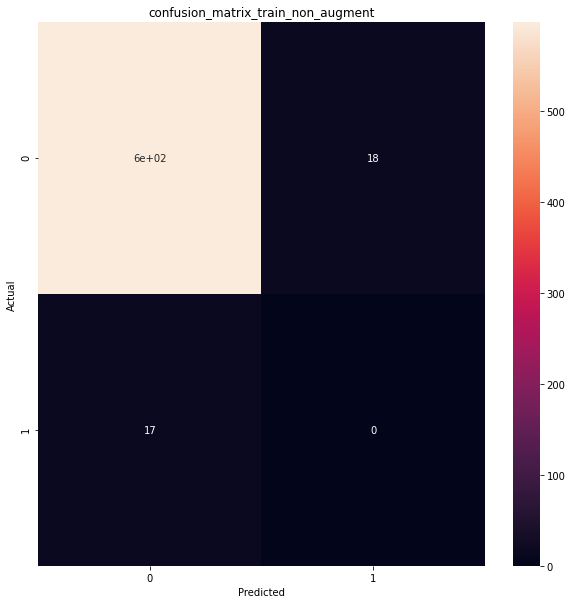

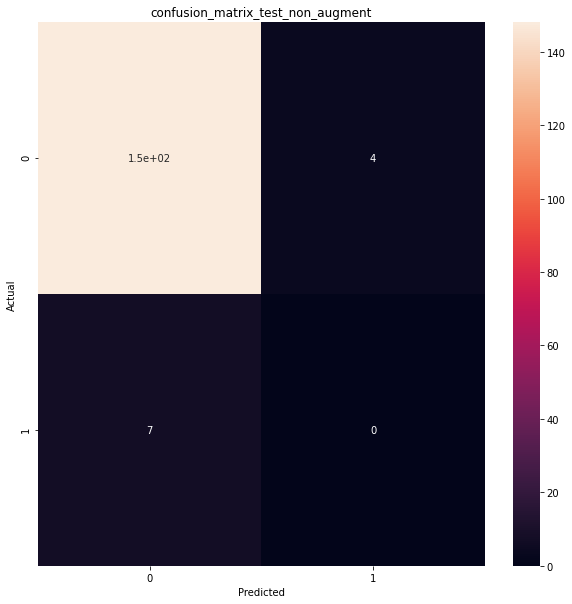

In [ ]:
for i in range(2):
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(confusion[i], annot=True)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(title[i])
  plt.show()

In [ ]:
print("**Training Score:** {}\\".format(accuracy_score(y_train_binary,y_train_predict)))
print("**Test Score:** {}\\".format(accuracy_score(y_test_binary,y_test_predict)))

**Training Score:** 0.944620253164557\
**Test Score:** 0.9308176100628931\


### Multi Diagnosis - Non Augmented

In [ ]:
brc = Birch(n_clusters=6)

brc.fit(X_pca_train_non_augmented)

y_train_predict = brc.predict(X_pca_train_non_augmented)
y_test_predict = brc.predict(X_pca_test_non_augmented)


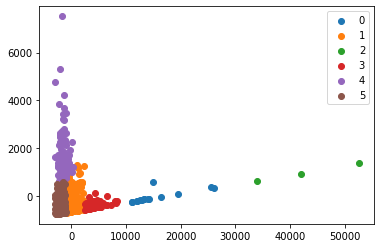

In [ ]:
u_labels = np.unique(y_train_predict)
centroids = brc.subcluster_centers_

for i in u_labels:
    plt.scatter(X_pca_train_non_augmented[y_train_predict == i , 0] , X_pca_train_non_augmented[y_train_predict == i , 1] , label = i)


plt.legend()
plt.show()

In [ ]:
confusion_matrix_train = contingency_matrix(y_train_multi,y_train_predict)
confusion_matrix_test = contingency_matrix(y_test_multi,y_test_predict)

In [ ]:
confusion_matrix_train = confusion_matrix_train[:, [0, 1, 5, 3, 4,2]]
confusion_matrix_test = confusion_matrix_test[:, [0, 1, 5, 3, 4,2]]
confusion = [confusion_matrix_train,confusion_matrix_test]
title = ["confusion_matrix_train","confusion_matrix_test"]

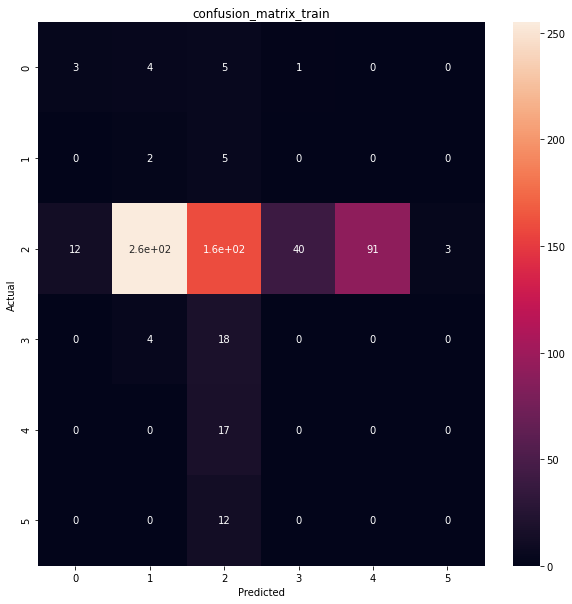

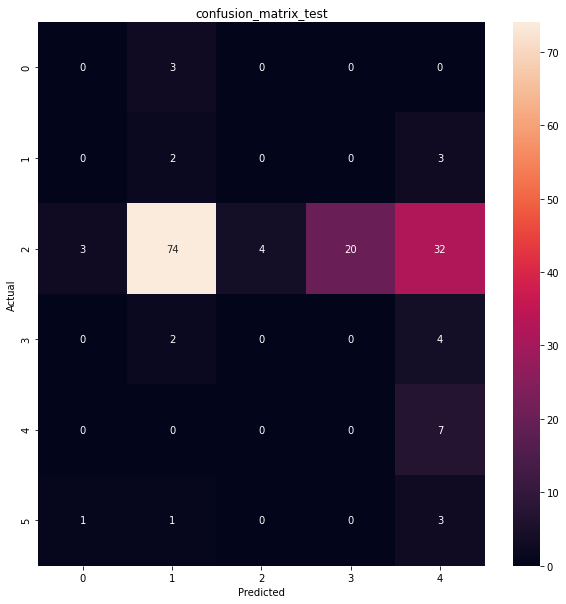

In [ ]:
for i in range(2):
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(confusion[i], annot=True)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(title[i])
  plt.show()

In [ ]:
print("**Training Score:** {}\\".format(accuracy_score(y_train_multi,y_train_predict)))
print("**Test Score:** {}\\".format(accuracy_score(y_test_multi,y_test_predict)))

**Training Score:** 0.03164556962025317\
**Test Score:** 0.031446540880503145\


### Binary Diagnosis - Augmented

In [ ]:
X_pca_train_augmented = pca.fit_transform(X_train_augmented_dataset)
X_pca_test_augmented = pca.fit_transform(X_test_augmented_dataset)

brc = Birch(n_clusters=2)

cluster = brc.fit(X_pca_train_augmented)

y_train_predict = brc.predict(X_pca_train_augmented)

y_test_predict = brc.predict(X_pca_test_augmented)

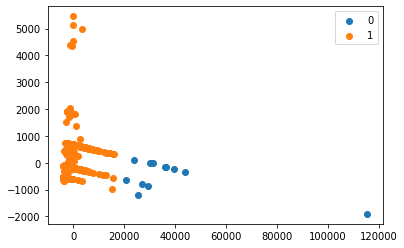

In [ ]:
u_labels = np.unique(y_train_predict)
centroids = brc.subcluster_centers_

for i in u_labels:
    plt.scatter(X_pca_train_augmented[y_train_predict == i , 0] , X_pca_train_augmented[y_train_predict == i , 1] , label = i)

plt.legend()
plt.show()

In [ ]:
y_train_predict[:] = [abs(x - 1) for x in y_train_predict]
y_test_predict[:] = [abs(x - 1) for x in y_test_predict]

In [ ]:
confusion_matrix_train = contingency_matrix(y_train_binary,y_train_predict)
confusion_matrix_test = contingency_matrix(y_test_binary,y_test_predict)

confusion = [confusion_matrix_train,confusion_matrix_test]
title = ["confusion_matrix_train_non_augment","confusion_matrix_test_non_augment"]
for x in confusion:
  print(x)

[[603  12]
 [ 17   0]]
[[149   3]
 [  7   0]]


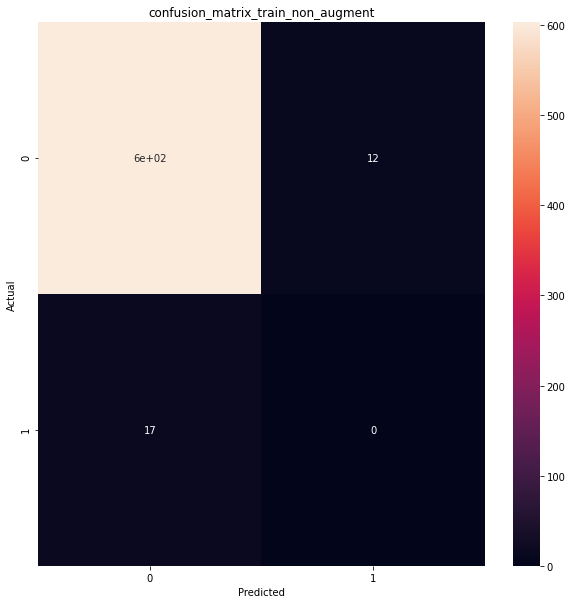

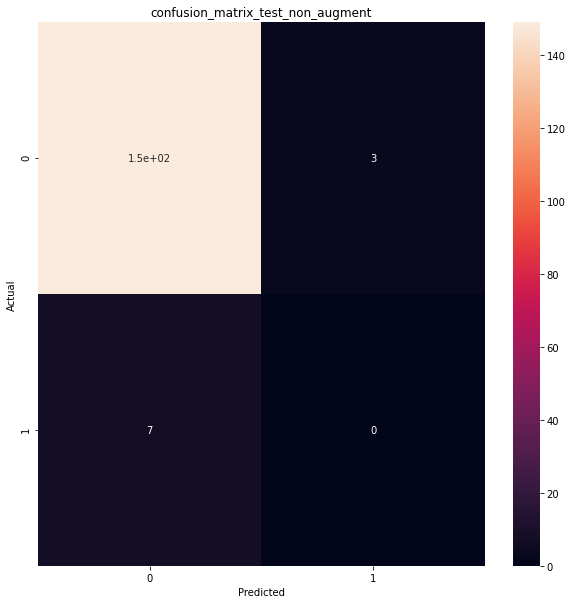

In [ ]:
for i in range(2):
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(confusion[i], annot=True)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(title[i])
  plt.show()

In [ ]:
print("**Training Score:** {}\\".format(accuracy_score(y_train_binary,y_train_predict)))
print("**Test Score:** {}\\".format(accuracy_score(y_test_binary,y_test_predict)))

**Training Score:** 0.9541139240506329\
**Test Score:** 0.9371069182389937\


### Multi Diagnosis - Augmented

In [ ]:
brc = Birch(n_clusters=6)

brc.fit(X_pca_train_augmented)

y_train_predict = brc.predict(X_pca_train_augmented)
y_test_predict = brc.predict(X_pca_test_augmented)


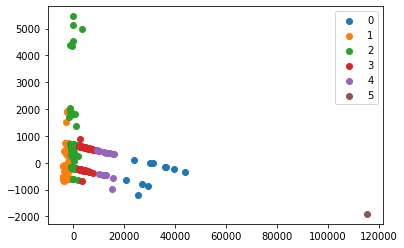

In [ ]:
u_labels = np.unique(y_train_predict)
centroids = brc.subcluster_centers_

for i in u_labels:
    plt.scatter(X_pca_train_augmented[y_train_predict == i , 0] , X_pca_train_augmented[y_train_predict == i , 1] , label = i)
 

plt.legend()
plt.show()

In [ ]:
confusion_matrix_train = contingency_matrix(y_train_multi,y_train_predict)
confusion_matrix_test = contingency_matrix(y_test_multi,y_test_predict)

In [ ]:
confusion_matrix_train

array([[  1,   6,   3,   2,   1,   0],
       [  0,   5,   2,   0,   0,   0],
       [ 10, 320, 146,  68,  16,   1],
       [  0,  20,   2,   0,   0,   0],
       [  0,  17,   0,   0,   0,   0],
       [  0,  10,   2,   0,   0,   0]])

In [ ]:
confusion_matrix_train = confusion_matrix_train[:, [0, 2, 1, 3, 4,5]]
confusion_matrix_test = confusion_matrix_test[:, [0, 2, 1, 3, 4,5]]

confusion = [confusion_matrix_train,confusion_matrix_test]
title = ["confusion_matrix_train","confusion_matrix_test"]

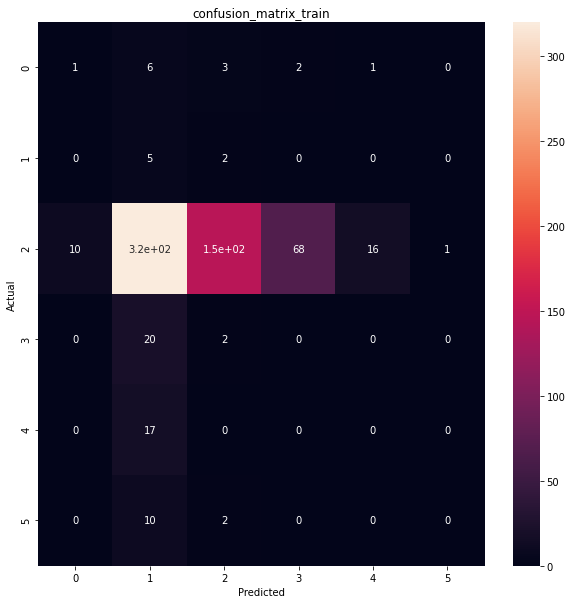

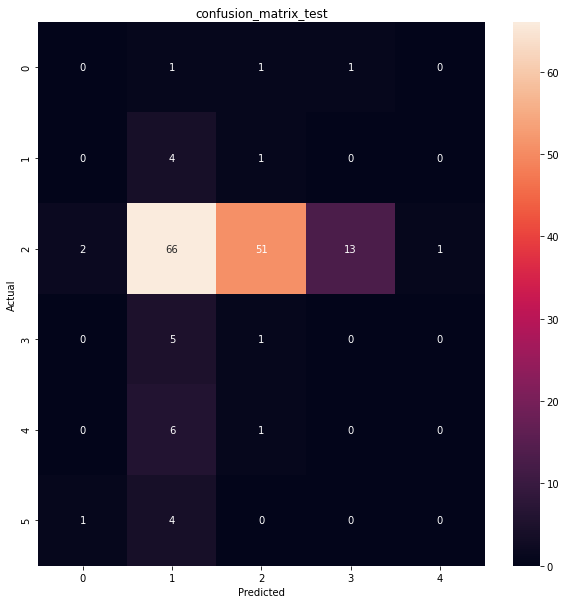

In [ ]:
for i in range(2):
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(confusion[i], annot=True)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(title[i])
  plt.show()

In [ ]:
print("**Training Score:** {}\\".format(accuracy_score(y_train_multi,y_train_predict)))
print("**Test Score:** {}\\".format(accuracy_score(y_test_multi,y_test_predict)))

**Training Score:** 0.24050632911392406\
**Test Score:** 0.34591194968553457\
